In [1]:
import xarray as xr
import gdal as gdl

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap

In [12]:
ds = gdl.Open('/Users/gunnar/src/data/dcs4cop/07/01/O_L2_0021_GCWNS_2017182100224_v1.0.nc')

In [21]:
print('File list:', ds.GetFileList())
print('Width:', ds.RasterXSize)
print('Height:', ds.RasterYSize)
print('Coordinate system:', ds.GetProjection())
gt = ds.GetGeoTransform() # captures origin and pixel size
print('Origin:', (gt[0], gt[3]))
print('Pixel size:', (gt[1], gt[5]))
print('Upper Left Corner:', gdl.ApplyGeoTransform(gt,0,0))
print('Upper Right Corner:', gdl.ApplyGeoTransform(gt,ds.RasterXSize,0))
print('Lower Left Corner:', gdl.ApplyGeoTransform(gt,0,ds.RasterYSize))
print('Lower Right Corner:',
gdl.ApplyGeoTransform(gt,ds.RasterXSize,ds.RasterYSize))
print('Center:', gdl.ApplyGeoTransform(gt,ds.RasterXSize/2,ds.RasterYSize/2))
#print('Metadata:', ds.GetMetadata())
print('Image Structure Metadata:', ds.GetMetadata('IMAGE_STRUCTURE'))
print('Number of bands:', ds.RasterCount)
for i in range(1, ds.RasterCount+1):
    band = ds.GetRasterBand(i) # in GDAL, band are indexed starting at 1!
    interp = band.GetColorInterpretation()
    interp_name = gdal.GetColorInterpretationName(interp)
    (w,h)=band.GetBlockSize()
    print('Band %d, block size %dx%d, color interp %s' % (i,w,h,interp_name))
    ovr_count = band.GetOverviewCount()
    for j in range(ovr_count):
        ovr_band = band.GetOverview(j) # but overview bands starting at 0
        print(' Overview %d: %dx%d'%(j, ovr_band.XSize, ovr_band.YSize))

File list: ['/Users/gunnar/src/data/dcs4cop/07/01/O_L2_0021_GCWNS_2017182100224_v1.0.nc']
Width: 512
Height: 512
Coordinate system: 
Origin: (0.0, 0.0)
Pixel size: (1.0, 1.0)
Upper Left Corner: [0.0, 0.0]
Upper Right Corner: [512.0, 0.0]
Lower Left Corner: [0.0, 512.0]
Lower Right Corner: [512.0, 512.0]
Center: [256.0, 256.0]
Image Structure Metadata: {}
Number of bands: 0


In [22]:
gdl.Info(ds)

'Driver: HDF5/Hierarchical Data Format Release 5\nFiles: /Users/gunnar/src/data/dcs4cop/07/01/O_L2_0021_GCWNS_2017182100224_v1.0.nc\nSize is 512, 512\nCoordinate System is `\'\nMetadata:\n  Adet_at_max_mask_color=255 0 255 255 \n  Adet_at_max_mask_expression=c2rcc_flags.Adet_at_max\n  Adet_at_max_mask_title=Adet output of the IOP retrieval neural net is at its maximum. This means that the true value is this value or higher.\n  Adet_at_max_mask_transparency=0.5 \n  Adet_at_min_mask_color=255 255 0 255 \n  Adet_at_min_mask_expression=c2rcc_flags.Adet_at_min\n  Adet_at_min_mask_title=Adet output of the IOP retrieval neural net is at its minimum. This means that the true value is this value or lower.\n  Adet_at_min_mask_transparency=0.5 \n  Agelb_at_max_mask_color=0 255 255 255 \n  Agelb_at_max_mask_expression=c2rcc_flags.Agelb_at_max\n  Agelb_at_max_mask_title=Agelb output of the IOP retrieval neural net is at its maximum. This means that the true value is this value or higher.\n  Agelb_a

In [31]:
res = ds.GetRasterBand('TP_latitude')

TypeError: in method 'Dataset_GetRasterBand', argument 2 of type 'int'

In [30]:
res

In [3]:
dat = xr.open_dataset('../07/01/O_L2_0021_GCWNS_2017182100224_v1.0.nc')

<xarray.Dataset>
Dimensions:                                            (tp_x: 65, tp_y: 3302, x: 4032, y: 3302)
Coordinates:
    lat                                                (y, x) float64 ...
    lon                                                (y, x) float64 ...
Dimensions without coordinates: tp_x, tp_y, x, y
Data variables:
    metadata                                           int8 ...
    pixel_classif_flags                                (y, x) int16 ...
    quality_flags                                      (y, x) uint32 ...
    rtoa_1                                             (y, x) float32 ...
    rtoa_2                                             (y, x) float32 ...
    rtoa_3                                             (y, x) float32 ...
    rtoa_4                                             (y, x) float32 ...
    rtoa_5                                             (y, x) float32 ...
    rtoa_6                                             (y, x) float32 ...
    rtoa

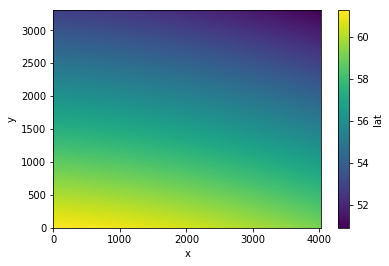

In [10]:
dat.lat.plot.imshow()

In [ ]:
dat.rtoa_12.plot()


In [11]:
res = dat.chl_lov_bourgneuf.data
ma_res = np.ma.array(res, mask =np.isnan(res))
vmin = None
vmax = None

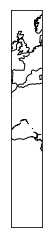

In [12]:
fig = plt.figure()
#ax = fig.add_axes([0.05,0.05,0.9,0.9])
#m = Basemap(projection='kav7',lon_0=54.,resolution='c')
m = Basemap(projection='merc',llcrnrlat=-45,urcrnrlat=65,\
            llcrnrlon=-10,urcrnrlon=10,lat_ts=2,resolution='c')

x,y = m(dat.lon.data,dat.lat.data)
m.drawcoastlines()
#m.drawmapboundary(fill_color='0.3')
ccmap = plt.cm.jet
#ccmap.set_bad("gray",1.)
im = m.pcolor(y,x,res,cmap=ccmap)


In [ ]:
plt.imshow(res)

In [ ]:

x,y = m(dat.lon.data,dat.lat.data)

In [ ]:
x.